# Prosper Loan data Exploration

## by (Alice Kiarie)

## Introduction
> Prosper loan dataset was a recorded from a loan lending company capturing various deatails about the loan, borrower details, loan status, interest rates,lending details etc 

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# loading the loan dataset
loans = pd.read_csv('prosperLoanData.csv')

In [4]:
#Viewing a samle of the dataset
loans.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
66140,92C93576397050294A9A67B,764100,2013-04-29 17:23:26.767000000,NaN,60,Current,NaN,0.22283,0.1984,0.1884,...,-79.48,0.0,0.00,0.00,0.0,1.0,1,0,0.0,142
73020,417233820910602917EAFE1,101994,2007-02-20 23:41:29.963000000,D,36,Completed,2008-12-16 00:00:00,0.17722,0.1700,0.1600,...,-78.01,0.0,0.00,0.00,0.0,1.0,0,0,0.0,70
18101,9E5933664650122314C7C68,20522,2006-06-19 12:11:52.210000000,C,36,Defaulted,2007-01-26 00:00:00,0.21739,0.2100,0.2050,...,-2.88,0.0,6849.03,6849.02,0.0,1.0,0,0,0.0,78
55261,BA1B346209841399986228F,423569,2009-09-08 13:27:47.967000000,NaN,36,Completed,2010-12-14 00:00:00,0.11088,0.0790,0.0690,...,-10.71,0.0,0.00,0.00,0.0,1.0,3,0,0.0,54
91343,71943496501716119273492,479713,2010-10-14 07:26:59.380000000,NaN,36,Completed,2011-10-13 00:00:00,0.34548,0.2845,0.2745,...,-6.91,0.0,0.00,0.00,0.0,1.0,0,0,0.0,83


In [5]:
# viewing the datatype and numbers of rows per variable
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> This dataset contains 113977 loans with 81 variables on each loan. 
Most variables are floatin nature
Some of the variables have alot of missing values e.g. CreditGrade, ClosedDate, EstimatedEffectiveYield, EstimatedLoss,EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore,TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing,


### What is/are the main feature(s) of interest in your dataset?

> From the loan dataset, I would like to see individual loan characteristics, relationship between two or more valiables defining loan characteristics, the borrowing characteristics and lender habits. This will be achived through plotting visualizations and drawing conclusions according to data distributions.
Examples
1. how does the length of the loan term affect the annual percentage rate and the loan interest rates
2. visualize varioes loan statuses
3. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 
1. term
2. loan status
3. BorrowerAPR
4. BorrowerRate
5. LenderYield
6. Listing category
7. Occupation
8. Employment status
9. BorroweHomeOwner
10. Income Range
11. MonthlyIncome
12. CreditScoreRangeLower
13. CreditScoreRangeUpper
14. CurrentCreditLines
15. OpenCreditLines
16. OpenRevokingLines
17. OpenRevolvingMonthlyPayment


# Data cleaning

In [6]:
# subsetting the column of interest
loans_data = loans[["Term","LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield","ListingCategory (numeric)", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner","IncomeRange", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "CurrentCreditLines", "OpenCreditLines", "TotalCreditLinespast7years", "OpenRevolvingMonthlyPayment", "OpenRevolvingAccounts"]]

In [7]:
# viewin a sample of the data
loans_data.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts
110770,60,Defaulted,0.27462,0.2489,0.2389,3,Food Service,Employed,True,"$25,000-49,999",2500.000000,700.0,719.0,1.0,2.0,20.0,0.0,1
92608,36,Completed,0.10190,0.0950,0.0900,0,Executive,Full-time,True,"$100,000+",8654.166667,780.0,799.0,11.0,8.0,57.0,35.0,7
97807,36,Completed,0.33097,0.2950,0.2850,1,Other,Employed,False,"$25,000-49,999",3500.000000,660.0,679.0,6.0,5.0,12.0,78.0,4
44990,36,Current,0.32446,0.2850,0.2750,1,Engineer - Mechanical,Employed,True,"$50,000-74,999",4500.000000,640.0,659.0,5.0,5.0,28.0,128.0,5
99597,36,Current,0.35797,0.3177,0.3077,2,Scientist,Employed,True,"$100,000+",15000.000000,700.0,719.0,11.0,10.0,40.0,1040.0,7


In [8]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerAPR                  113912 non-null  float64
 3   BorrowerRate                 113937 non-null  float64
 4   LenderYield                  113937 non-null  float64
 5   ListingCategory (numeric)    113937 non-null  int64  
 6   Occupation                   110349 non-null  object 
 7   EmploymentStatus             111682 non-null  object 
 8   IsBorrowerHomeowner          113937 non-null  bool   
 9   IncomeRange                  113937 non-null  object 
 10  StatedMonthlyIncome          113937 non-null  float64
 11  CreditScoreRangeLower        113346 non-null  float64
 12  CreditScoreRangeUpper        113346 non-null  float64
 13 

In [9]:
loans_data['BorrowerAPR'].value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

In [10]:
loans_data['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.2201       1
0.0752       1
0.1416       1
0.2812       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

In [11]:
# finding out the total number of null values in our dataset
loans_data.isnull().sum()

Term                              0
LoanStatus                        0
BorrowerAPR                      25
BorrowerRate                      0
LenderYield                       0
ListingCategory (numeric)         0
Occupation                     3588
EmploymentStatus               2255
IsBorrowerHomeowner               0
IncomeRange                       0
StatedMonthlyIncome               0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
CurrentCreditLines             7604
OpenCreditLines                7604
TotalCreditLinespast7years      697
OpenRevolvingMonthlyPayment       0
OpenRevolvingAccounts             0
dtype: int64

In [12]:
#dropping all the null values
loans_data.dropna(inplace=True)
print(loans_data)

        Term              LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0         36               Completed      0.16516        0.1580       0.1380   
1         36                 Current      0.12016        0.0920       0.0820   
3         36                 Current      0.12528        0.0974       0.0874   
4         36                 Current      0.24614        0.2085       0.1985   
5         60                 Current      0.15425        0.1314       0.1214   
...      ...                     ...          ...           ...          ...   
113932    36                 Current      0.22354        0.1864       0.1764   
113933    36  FinalPaymentInProgress      0.13220        0.1110       0.1010   
113934    60                 Current      0.23984        0.2150       0.2050   
113935    60               Completed      0.28408        0.2605       0.2505   
113936    36                 Current      0.13189        0.1039       0.0939   

        ListingCategory (numeric)      

C:\Users\AKiarie\AppData\Local\Temp\ipykernel_13780\2326977126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_data.dropna(inplace=True)


In [13]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104980 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         104980 non-null  int64  
 1   LoanStatus                   104980 non-null  object 
 2   BorrowerAPR                  104980 non-null  float64
 3   BorrowerRate                 104980 non-null  float64
 4   LenderYield                  104980 non-null  float64
 5   ListingCategory (numeric)    104980 non-null  int64  
 6   Occupation                   104980 non-null  object 
 7   EmploymentStatus             104980 non-null  object 
 8   IsBorrowerHomeowner          104980 non-null  bool   
 9   IncomeRange                  104980 non-null  object 
 10  StatedMonthlyIncome          104980 non-null  float64
 11  CreditScoreRangeLower        104980 non-null  float64
 12  CreditScoreRangeUpper        104980 non-null  float64
 13 

In [14]:
loans_data['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26341
Self-employed     6132
Other             2474
Part-time         1084
Not employed       832
Retired            795
Name: EmploymentStatus, dtype: int64

In [25]:
# selecting 500 random rows to represent the dataset
np.random.seed(1)
sample_loansdata = loans_data.sample(500)

# questions

1. What factors affect a loan’s outcome status?
2. What affects the borrower’s APR or interest rate?
3. Are there differences between loans depending on how large the original loan amount was?

1. how is the the loans interset rate affected by the duration(term) of the loan

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


# question
What duration of the loan did majority of the people prefer

In [26]:
sample_loansdata['Term'].value_counts()

36    378
60    116
12      6
Name: Term, dtype: int64

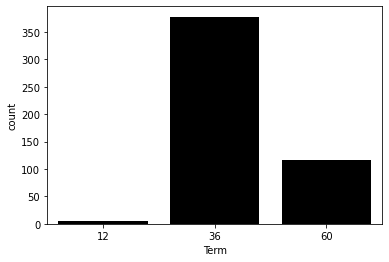

In [27]:
sb.countplot(data =sample_loansdata, x = 'Term', color='black');

# Observation

Majority of the loans had a duration of 3 years folled by 5 year loans. One year loasns were the least

# Question 2
What id the loan status of most borrowers from the dataset

In [17]:
credit_ordinal = df_new['CreditGrade'].value_counts().index.sort_values()

cat_dtype = pd.api.types.CategoricalDtype(ordered=True,categories=credit_ordinal)

df_new['CreditGrade'] = df_new['CreditGrade'].astype(cat_dtype)

NameError: name 'df_new' is not defined

In [28]:
LoanStatus_order = ['Current', 'Completed','FinalPaymentInProgress', 'PastDue(1-15days)', 'PastDue(16-30days)', 'PastDue(31-60days)','PastDue(61-90days)', 'PastDue(91-120days)', 'PastDue(120days)', 'Chargedoff', 'defaulted']
dtype = pd.api.types.CategoricalDtype(ordered=True,categories=LoanStatus_order)
sample_loansdata['LoanStatus'] = sample_loansdata['LoanStatus'].astype(dtype)

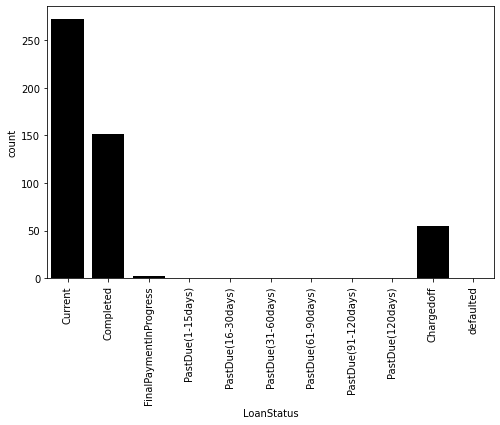

In [29]:
plt.figure(figsize = [8,5])
sb.countplot(data =sample_loansdata, x = 'LoanStatus', color='black');
plt.xticks(rotation=90);

In [30]:
sample_loansdata['LoanStatus'].value_counts()

Current                   272
Completed                 151
Chargedoff                 55
FinalPaymentInProgress      2
PastDue(1-15days)           0
PastDue(16-30days)          0
PastDue(31-60days)          0
PastDue(61-90days)          0
PastDue(91-120days)         0
PastDue(120days)            0
defaulted                   0
Name: LoanStatus, dtype: int64

# answer

Majority of the people had a current loan status as compaired to those who had completed, the charged off and those who had defaulted among others.

In [32]:
sample_loansdata['IncomeRange'].value_counts()

$25,000-49,999    152
$50,000-74,999    150
$100,000+          97
$75,000-99,999     68
$1-24,999          27
$0                  5
Not employed        1
Name: IncomeRange, dtype: int64

In [22]:
credit_ordinal = df_new['CreditGrade'].value_counts().index.sort_values()

cat_dtype = pd.api.types.CategoricalDtype(ordered=True,categories=credit_ordinal)

df_new['CreditGrade'] = df_new['CreditGrade'].astype(cat_dtype)

NameError: name 'df_new' is not defined

In [33]:
sample_loansdata['StatedMonthlyIncome'].value_counts()

5000.000000     16
5833.333333     13
5416.666667     12
2500.000000     12
2916.666667     11
                ..
87.333333        1
2583.333333      1
5116.666667      1
11750.000000     1
2849.583333      1
Name: StatedMonthlyIncome, Length: 222, dtype: int64

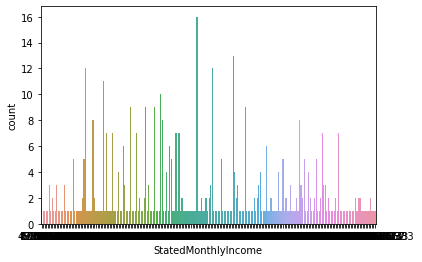

In [34]:
sb.countplot(data=sample_loansdata, x='StatedMonthlyIncome')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('count');

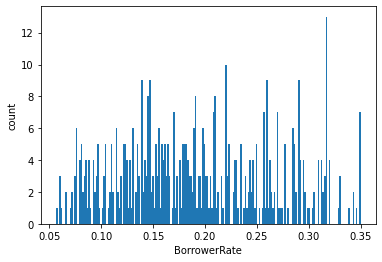

In [35]:
plt.hist(data=sample_loansdata, x='BorrowerRate', bins=200)
plt.xlabel('BorrowerRate')
plt.ylabel('count');

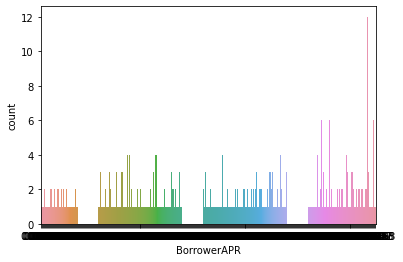

In [36]:
sb.countplot(data=sample_loansdata, x='BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('count');

# Interest rates

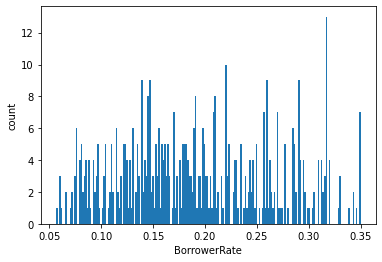

In [37]:
plt.hist(data=sample_loansdata, x='BorrowerRate', bins=200)
plt.xlabel('BorrowerRate')
plt.ylabel('count');

# LenderYield

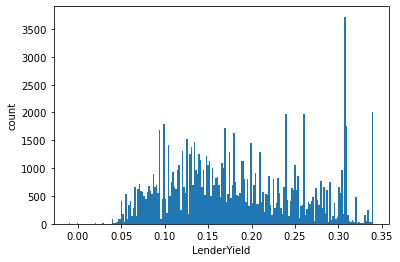

In [41]:
plt.hist(data=loans_data, x='LenderYield', bins=200)
plt.xlabel('LenderYield')
plt.ylabel('count');

# ListingCategory (numeric)

In [45]:
loans_data['ListingCategory (numeric)'].value_counts()

1     57199
7     10398
0      9347
2      7391
3      7184
6      2561
4      2392
13     1975
15     1500
18      880
14      865
20      769
19      758
5       756
16      304
11      217
8       199
10       91
9        85
12       58
17       51
Name: ListingCategory (numeric), dtype: int64

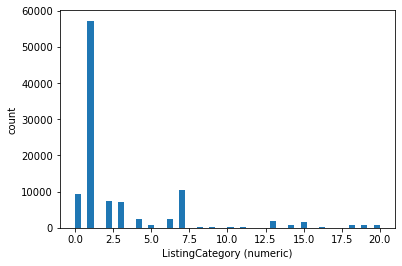

In [44]:
plt.hist(data=loans_data, x='ListingCategory (numeric)', bins=50)
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('count');

In [ ]:
# findings
loans_data['Term'].value_counts()

# findings
Majority of the rates falled between 0.13 to 0.22 although there was some ouliers in the data



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

